In [118]:
import jieba
import jieba.posseg as pseg
from docx import Document
import requests
import os
import pandas as pd
import numpy as np

In [2]:
### 分词

In [3]:
# 下载停用词表
url = "https://raw.githubusercontent.com/goto456/stopwords/master/cn_stopwords.txt"
stopwords = requests.get(url).text
stopwords = set(stopwords.splitlines())

In [4]:
# 读取文本文件
def read_text_from_docx(file_path):
    document = Document(file_path)
    text = []
    
    for para in document.paragraphs:
        text.append(para.text)
    
    return "\n".join(text)

In [5]:
# 读取停用词
def preprocess_chinese_text(text):
    # 使用jieba进行分词和词性标注
    words = jieba.cut_for_search(text)
    
    # 过滤停用词和进行词性选择
    filtered_words = [word for word in words if word not in stopwords]  

    return filtered_words

In [6]:
def process_documents(directory, output_filename):
    """处理目录下的所有.docx文件，并保存分词结果到CSV文件中。"""
    data = []
    for filename in os.listdir(directory):
        if filename.endswith(".docx"):
            file_path = os.path.join(directory, filename)
            text = read_text_from_docx(file_path)
            segmented_text = preprocess_chinese_text(text)
            data.append({'filename': filename, 'text': segmented_text})
    
    # 将数据转换成DataFrame并保存到CSV文件
    df = pd.DataFrame(data)
    df.to_csv(output_filename, index=False, encoding='utf-8')

In [7]:
# 指定包含.docx文件的目录和输出CSV文件的路径
directory = "技术1"
output_filename = "segmented_text.csv"

In [8]:
# 处理指定目录中的所有.docx文件并将结果保存为CSV
process_documents(directory, output_filename)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\LIUYIN~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.478 seconds.
Prefix dict has been built successfully.


In [9]:
### LDA建模

In [10]:
from gensim import corpora, models
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel

In [16]:
def load_data(file_path):
    """从CSV文件加载数据。"""
    df = pd.read_csv(file_path)
    # 假设CSV文件中每行包含一个文档的分词文本
    # 将字符串形式的列表转换为真正的列表
    df['text'] = df['text'].apply(eval)
    return df['text'].tolist()

In [17]:
def prepare_corpus(documents):
    """准备语料库和词典，用于LDA模型。"""
    # 创建字典
    dictionary = corpora.Dictionary(documents)
    # 使用字典转换文本数据为词袋模型
    corpus = [dictionary.doc2bow(text) for text in documents]
    return dictionary, corpus

In [41]:
def lda_model(corpus, dictionary, num_topics=5):
    """训练LDA模型并返回。"""
    # 设置训练LDA模型的参数
    lda = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=30)
    return lda


In [42]:
# 加载数据
file_path = 'segmented_text.csv'
documents = load_data(file_path)

In [43]:
documents

[['技术',
  '革命',
  '正在',
  '改变',
  '生活',
  '方式',
  '新',
  '技术',
  '带来',
  '前所',
  '未有',
  '前所未有',
  '便利',
  '效率'],
 ['现代',
  '技术',
  '人工',
  '智能',
  '人工智能',
  '数据',
  '正在',
  '推动',
  '科技',
  '进步',
  '科技进步',
  '影响',
  '社会',
  '层面'],
 ['技术',
  '教育',
  '领域',
  '教育领域',
  '应用',
  '越来',
  '越来越',
  '广泛',
  '互联',
  '联网',
  '互联网',
  '课堂',
  '智能',
  '教学',
  '工具',
  '技术',
  '正在',
  '彻底',
  '改变',
  '彻底改变',
  '教育',
  '模式'],
 ['新',
  '技术',
  '遥控',
  '手术',
  '系统',
  '数字',
  '数字化',
  '医疗',
  '记录',
  '正在',
  '革新',
  '传统',
  '医疗',
  '提高',
  '治疗',
  '效率'],
 ['技术',
  '进步',
  '经济',
  '增长',
  '重要',
  '驱动',
  '动力',
  '驱动力',
  '尤其',
  '自动',
  '自动化',
  '网络',
  '技术',
  '领域',
  '应用'],
 ['技术',
  '发展',
  '正在',
  '引导',
  '社会',
  '变革',
  '社会变革',
  '多个',
  '方面',
  '特别',
  '通信',
  '信息',
  '传播',
  '方式'],
 ['环保',
  '技术',
  '如可',
  '再生',
  '能源',
  '再生能源',
  '节能',
  '设备',
  '正在',
  '帮助',
  '减少',
  '环境',
  '污染',
  '环境污染',
  '技术',
  '实现',
  '持续',
  '发展',
  '关键'],
 ['现代',
  '农业',
  '现代农业',
  '技术',
  '包括',
  '精密',
  '农业',
  '遗

In [44]:
# 准备语料库和字典
dictionary, corpus = prepare_corpus(documents)

In [45]:
# 训练LDA模型
num_topics = 5
lda = lda_model(corpus, dictionary, num_topics=num_topics)

In [46]:
lda.print_topics()

[(0,
  '0.042*"正在" + 0.042*"技术" + 0.026*"系统" + 0.026*"智能" + 0.018*"发展" + 0.018*"驾驶" + 0.018*"交通" + 0.018*"医疗" + 0.010*"创新" + 0.010*"消耗"'),
 (1,
  '0.041*"技术" + 0.032*"正在" + 0.031*"教育" + 0.022*"领域" + 0.022*"教育领域" + 0.022*"农业" + 0.012*"现代" + 0.012*"包括" + 0.012*"工具" + 0.012*"变革"'),
 (2,
  '0.056*"技术" + 0.025*"改变" + 0.025*"方式" + 0.025*"智能" + 0.025*"建筑" + 0.025*"正在" + 0.017*"效率" + 0.017*"新" + 0.017*"生活" + 0.017*"金融"'),
 (3,
  '0.053*"技术" + 0.023*"影响" + 0.023*"智能" + 0.023*"全球" + 0.023*"重要" + 0.023*"塑造" + 0.023*"正在" + 0.012*"社会" + 0.012*"进步" + 0.012*"人工"'),
 (4,
  '0.052*"技术" + 0.027*"数据" + 0.015*"发展" + 0.015*"新" + 0.015*"数字" + 0.015*"帮助" + 0.015*"节能" + 0.015*"持续" + 0.015*"能源" + 0.015*"实现"')]

In [ ]:
### 评价LDA模型 ###

In [51]:
#计算coherence score
def coherence(num_topics):
    lda = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=30, random_state=42)
    coherence_model_lda = models.CoherenceModel(model=lda, texts=documents, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    return coherence_lda


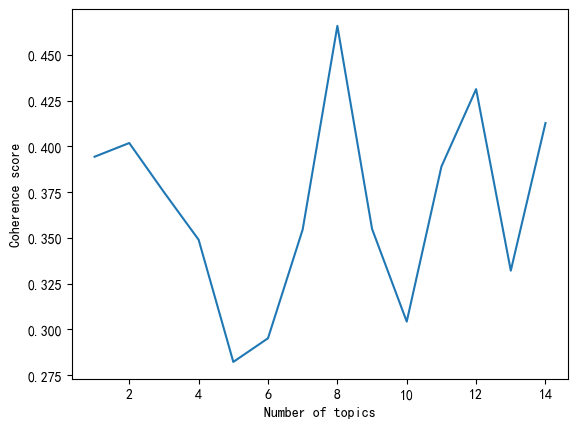

In [52]:
# 绘制主题-coherence曲线
import matplotlib.pyplot as plt
import matplotlib
x = range(1,15)
y = [coherence(i) for i in x]
plt.plot(x,y)
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')
plt.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
plt.show()

In [63]:
# 以最优主题数8来训练LDA模型
num_topics = 8
lda = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=30, random_state=42)

In [64]:
lda.print_topics()

[(0,
  '0.036*"改变" + 0.036*"农业" + 0.036*"技术" + 0.019*"方式" + 0.019*"现代" + 0.019*"包括" + 0.019*"生活" + 0.019*"提高" + 0.019*"现代农业" + 0.019*"遗传工程"'),
 (1,
  '0.052*"技术" + 0.040*"正在" + 0.027*"智能" + 0.027*"系统" + 0.027*"医疗" + 0.027*"改变" + 0.027*"交通" + 0.027*"教育" + 0.014*"创新" + 0.014*"效率"'),
 (2,
  '0.055*"技术" + 0.037*"智能" + 0.020*"社会" + 0.020*"自动" + 0.020*"领域" + 0.020*"塑造" + 0.020*"联网" + 0.020*"应用" + 0.020*"未来" + 0.020*"各行"'),
 (3,
  '0.041*"技术" + 0.028*"智能" + 0.028*"影响" + 0.028*"进步" + 0.028*"人工" + 0.028*"人工智能" + 0.028*"正在" + 0.015*"新" + 0.015*"不断" + 0.015*"面对"'),
 (4,
  '0.067*"技术" + 0.034*"正在" + 0.023*"系统" + 0.023*"发展" + 0.023*"金融" + 0.012*"驾驶" + 0.012*"无人驾驶" + 0.012*"无人" + 0.012*"飞行器" + 0.012*"旅行"'),
 (5,
  '0.052*"技术" + 0.052*"建筑" + 0.035*"数据" + 0.019*"新" + 0.019*"效率" + 0.019*"数字" + 0.019*"应用" + 0.019*"广泛" + 0.019*"凸显" + 0.019*"安全"'),
 (6,
  '0.037*"正在" + 0.037*"发展" + 0.037*"技术" + 0.020*"方式" + 0.020*"实现" + 0.020*"帮助" + 0.020*"环境" + 0.020*"减少" + 0.020*"污染" + 0.020*"能源"'),
 (7,
  '0.042*"全球" +

In [65]:
### 储存主题分布 ###

In [66]:
lda.get_document_topics(corpus[1],minimum_probability=0.0)

[(0, 0.008336345),
 (1, 0.008337688),
 (2, 0.008341024),
 (3, 0.9416328),
 (4, 0.008337231),
 (5, 0.008339456),
 (6, 0.008337947),
 (7, 0.0083375)]

In [67]:
### 获取每个文档的主题分布
def get_topic_distribution(lda, corpus):
    topic_distribution = []
    for doc in corpus:
        topic_distribution.append(lda.get_document_topics(doc,minimum_probability=0.0))
    return topic_distribution

In [68]:
### 保存主题分布到文件

def save_topic_distribution(lda, corpus, output_filename):
    topic_distribution = get_topic_distribution(lda, corpus)
    df = pd.DataFrame(topic_distribution)
    df.to_csv(output_filename, index=False)

In [69]:
output_filename = 'topic_distribution.csv'
save_topic_distribution(lda, corpus, output_filename)

In [70]:
### 主题可视化 ###

import pyLDAvis.gensim
pyLDAvis.enable_notebook()
data = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
pyLDAvis.save_html(data, 'lda.html')

In [71]:
### 计算文档之间的主题距离 ###

In [75]:
def calculate_topic_distance_abs_diff(doc_topics_i, doc_topics_j):
    # 保证每个主题的概率被考虑到，即使某些主题在某文档中的概率为0
        # 将主题分布转换为字典形式
    topic_dist_i = dict(doc_topics_i)
    topic_dist_j = dict(doc_topics_j)
    
    # 获取所有主题的并集
    all_topics = set(topic_dist_i.keys()).union(set(topic_dist_j.keys()))
    distance = sum(abs(topic_dist_i.get(topic, 0) - topic_dist_j.get(topic, 0)) for topic in all_topics)
    return distance

In [73]:
doc_topics = get_topic_distribution(lda, corpus)

In [76]:
# 选择两个文档计算它们之间的距离
doc_index1, doc_index2 = 0, 1  # 选择文档索引
distance = calculate_topic_distance_abs_diff(doc_topics[doc_index1], doc_topics[doc_index2])
print(f"Distance between Document {doc_index1} and Document {doc_index2}: {distance}")

Distance between Document 0 and Document 1: 1.8666093479841948


In [77]:
# 计算所有文档之间的主题距离 
def calculate_all_topic_distances(doc_topics):
    num_docs = len(doc_topics)
    distances = [[0] * num_docs for _ in range(num_docs)]
    
    for i in range(num_docs):
        for j in range(i+1, num_docs):
            distance = calculate_topic_distance_abs_diff(doc_topics[i], doc_topics[j])
            distances[i][j] = distances[j][i] = distance
    
    return distances

In [78]:
### 结合主题距离的PageRank计算 ###

In [94]:
# 构建网络结构(TF-IDF、Word2Vec、BERT)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [89]:
# 预处理
def process_documents(directory):
    """处理目录下的所有.docx文件，并返回一个包含所有文档文本的列表。"""
    documents = []
    for filename in os.listdir(directory):
        if filename.endswith(".docx"):
            file_path = os.path.join(directory, filename)
            text = read_text_from_docx(file_path)
            # 进行简单的分词处理
            processed_text = " ".join(jieba.cut(text))
            documents.append(processed_text)
    return documents

directory = "技术1"
texts = process_documents(directory)

In [91]:
# 计算TF-IDF矩阵
vectorizer = TfidfVectorizer(min_df=0.01,max_df=0.99)
tfidf_matrix = vectorizer.fit_transform(texts)

In [92]:
# 计算余弦相似度
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

[[1.         0.02124837 0.01775893 0.08011629 0.         0.083892
  0.01814028 0.02006535 0.02106836 0.20393954 0.01751142 0.29489289
  0.         0.         0.08257131 0.0190883  0.07021569 0.04283099
  0.06451282 0.        ]
 [0.02124837 1.         0.01741034 0.01584796 0.         0.01903927
  0.0177842  0.01967149 0.27129136 0.01861333 0.01716769 0.
  0.08230208 0.         0.01633359 0.08083857 0.18230579 0.06737033
  0.01824914 0.        ]
 [0.01775893 0.01741034 1.         0.01324538 0.07197389 0.01591261
  0.01486365 0.016441   0.06631109 0.05975703 0.01434839 0.
  0.         0.03722269 0.01365126 0.09163247 0.0972573  0.
  0.05858783 0.        ]
 [0.08011629 0.01584796 0.01324538 1.         0.         0.01448463
  0.01352981 0.08767886 0.0157137  0.07018095 0.01306078 0.
  0.         0.04717668 0.06158527 0.01423689 0.01511081 0.
  0.01388352 0.        ]
 [0.         0.         0.07197389 0.         1.         0.
  0.         0.         0.         0.         0.         0.
  0.  

In [98]:
# 尝试不同的阈值
for threshold in np.arange(0.01, 0.1, 0.01):
    print(f"\n阈值: {threshold:.2f}")
    sim_pairs = np.argwhere(cosine_sim > threshold)
    c = 0
    for i, j in sim_pairs:
        if i != j:
            c += 1
            print(f"文档 {i} 和文档 {j} 的相似度为 {cosine_sim[i, j]:.3f}")
    print(f"总共找到 {c} 对相似文档")

# 取阈值为0.05


阈值: 0.01
文档 0 和文档 1 的相似度为 0.021
文档 0 和文档 2 的相似度为 0.018
文档 0 和文档 3 的相似度为 0.080
文档 0 和文档 5 的相似度为 0.084
文档 0 和文档 6 的相似度为 0.018
文档 0 和文档 7 的相似度为 0.020
文档 0 和文档 8 的相似度为 0.021
文档 0 和文档 9 的相似度为 0.204
文档 0 和文档 10 的相似度为 0.018
文档 0 和文档 11 的相似度为 0.295
文档 0 和文档 14 的相似度为 0.083
文档 0 和文档 15 的相似度为 0.019
文档 0 和文档 16 的相似度为 0.070
文档 0 和文档 17 的相似度为 0.043
文档 0 和文档 18 的相似度为 0.065
文档 1 和文档 0 的相似度为 0.021
文档 1 和文档 2 的相似度为 0.017
文档 1 和文档 3 的相似度为 0.016
文档 1 和文档 5 的相似度为 0.019
文档 1 和文档 6 的相似度为 0.018
文档 1 和文档 7 的相似度为 0.020
文档 1 和文档 8 的相似度为 0.271
文档 1 和文档 9 的相似度为 0.019
文档 1 和文档 10 的相似度为 0.017
文档 1 和文档 12 的相似度为 0.082
文档 1 和文档 14 的相似度为 0.016
文档 1 和文档 15 的相似度为 0.081
文档 1 和文档 16 的相似度为 0.182
文档 1 和文档 17 的相似度为 0.067
文档 1 和文档 18 的相似度为 0.018
文档 2 和文档 0 的相似度为 0.018
文档 2 和文档 1 的相似度为 0.017
文档 2 和文档 3 的相似度为 0.013
文档 2 和文档 4 的相似度为 0.072
文档 2 和文档 5 的相似度为 0.016
文档 2 和文档 6 的相似度为 0.015
文档 2 和文档 7 的相似度为 0.016
文档 2 和文档 8 的相似度为 0.066
文档 2 和文档 9 的相似度为 0.060
文档 2 和文档 10 的相似度为 0.014
文档 2 和文档 13 的相似度为 0.037
文档 2 和文档 14 的相似度为 0.014
文档 2 和文

In [102]:
# 设置相似度阈值并构建链接
similarity_threshold = 0.05
links_tuples = np.where(cosine_sim > similarity_threshold)

# 输出链接信息
for i, j in zip(*links_tuples):
    if i != j:  # 排除自身链接
        print(f"文档 {i} 与 文档 {j} 之间存在链接")

文档 0 与 文档 3 之间存在链接
文档 0 与 文档 5 之间存在链接
文档 0 与 文档 9 之间存在链接
文档 0 与 文档 11 之间存在链接
文档 0 与 文档 14 之间存在链接
文档 0 与 文档 16 之间存在链接
文档 0 与 文档 18 之间存在链接
文档 1 与 文档 8 之间存在链接
文档 1 与 文档 12 之间存在链接
文档 1 与 文档 15 之间存在链接
文档 1 与 文档 16 之间存在链接
文档 1 与 文档 17 之间存在链接
文档 2 与 文档 4 之间存在链接
文档 2 与 文档 8 之间存在链接
文档 2 与 文档 9 之间存在链接
文档 2 与 文档 15 之间存在链接
文档 2 与 文档 16 之间存在链接
文档 2 与 文档 18 之间存在链接
文档 3 与 文档 0 之间存在链接
文档 3 与 文档 7 之间存在链接
文档 3 与 文档 9 之间存在链接
文档 3 与 文档 14 之间存在链接
文档 4 与 文档 2 之间存在链接
文档 4 与 文档 19 之间存在链接
文档 5 与 文档 0 之间存在链接
文档 5 与 文档 6 之间存在链接
文档 5 与 文档 8 之间存在链接
文档 5 与 文档 9 之间存在链接
文档 5 与 文档 10 之间存在链接
文档 5 与 文档 11 之间存在链接
文档 5 与 文档 18 之间存在链接
文档 6 与 文档 5 之间存在链接
文档 6 与 文档 8 之间存在链接
文档 6 与 文档 10 之间存在链接
文档 6 与 文档 18 之间存在链接
文档 7 与 文档 3 之间存在链接
文档 7 与 文档 10 之间存在链接
文档 7 与 文档 17 之间存在链接
文档 8 与 文档 1 之间存在链接
文档 8 与 文档 2 之间存在链接
文档 8 与 文档 5 之间存在链接
文档 8 与 文档 6 之间存在链接
文档 8 与 文档 9 之间存在链接
文档 8 与 文档 10 之间存在链接
文档 8 与 文档 15 之间存在链接
文档 8 与 文档 16 之间存在链接
文档 8 与 文档 17 之间存在链接
文档 8 与 文档 18 之间存在链接
文档 9 与 文档 0 之间存在链接
文档 9 与 文档 2 之间存在链接
文档 9 与 文档 3 之间存在链接
文档 9 与

In [103]:
# 转换为每个文档的出链列表
num_documents = cosine_sim.shape[0]
links = [[] for _ in range(num_documents)]
for i, j in zip(*links_tuples):
    if i != j:  # 排除自身链接
        links[i].append(j)

In [104]:
# 输出链接信息
for i, linked_docs in enumerate(links):
    print(f"文档 {i} 链接到 {linked_docs}")

文档 0 链接到 [3, 5, 9, 11, 14, 16, 18]
文档 1 链接到 [8, 12, 15, 16, 17]
文档 2 链接到 [4, 8, 9, 15, 16, 18]
文档 3 链接到 [0, 7, 9, 14]
文档 4 链接到 [2, 19]
文档 5 链接到 [0, 6, 8, 9, 10, 11, 18]
文档 6 链接到 [5, 8, 10, 18]
文档 7 链接到 [3, 10, 17]
文档 8 链接到 [1, 2, 5, 6, 9, 10, 15, 16, 17, 18]
文档 9 链接到 [0, 2, 3, 5, 8, 11, 13, 16, 18]
文档 10 链接到 [5, 6, 7, 8, 17, 18]
文档 11 链接到 [0, 5, 9]
文档 12 链接到 [1, 17]
文档 13 链接到 [9, 18]
文档 14 链接到 [0, 3, 18]
文档 15 链接到 [1, 2, 8, 16]
文档 16 链接到 [0, 1, 2, 8, 9, 15, 18]
文档 17 链接到 [1, 7, 8, 10, 12]
文档 18 链接到 [0, 2, 5, 6, 8, 9, 10, 13, 14, 16]
文档 19 链接到 [4]


In [113]:
# 结合主题距离的PageRank公式
def page_rank_with_topic_distance(links, topic_distances, alpha=0.85, convergence_threshold=0.0001):
    N = len(links)
    pr = np.ones(N) / N
    change = 1
    while change > convergence_threshold:
        new_pr = np.zeros(N)
        for i in range(N):
            for j in links[i]:
                new_pr[i] += (pr[j] * (1 - topic_distances[j][i]) / len(links[j]))
        new_pr = (1 - alpha)  + alpha * new_pr
        change = np.linalg.norm(new_pr - pr)
        pr = new_pr
    return pr

In [114]:
topic_distances = calculate_all_topic_distances(doc_topics)
pagerank_score = page_rank_with_topic_distance(links, topic_distances)

In [117]:
topic_distances

[[0,
  1.8666093479841948,
  1.9071943452581763,
  1.8803351451642811,
  1.8739162627607584,
  1.866615585051477,
  0.029199820011854172,
  1.899949877988547,
  1.880321566015482,
  1.8738908413797617,
  0.029220229480415583,
  1.865390868857503,
  1.8999671884812415,
  3.6747194826602936e-05,
  1.8666009176522493,
  1.891188699286431,
  1.860513711348176,
  1.8911941791884601,
  1.8860587971284986,
  1.8739345213398337],
 [1.8666093479841948,
  0,
  1.9072068380191922,
  1.8803476709872484,
  1.8739054268226027,
  1.866612653248012,
  1.8957838919013739,
  1.899962659459561,
  1.8803107533603907,
  1.8739033406600356,
  1.895804338157177,
  1.8654050417244434,
  1.8999661626294255,
  1.8666185503825545,
  1.8665993763133883,
  0.024596916045993567,
  1.8605164615437388,
  0.02460242249071598,
  1.8860577857121825,
  1.8739298405125737],
 [1.9071943452581763,
  1.9072068380191922,
  0,
  0.026859204284846783,
  1.9082488780841231,
  1.907207677140832,
  1.9113788045942783,
  1.91197144

In [116]:
pagerank_score

array([ 0.04905213,  0.14341287,  0.1072573 ,  0.09455175,  0.03405343,
        0.05509284,  0.16468446,  0.10068152,  0.00405705,  0.07992285,
        0.14083927,  0.13246301,  0.11490476,  0.14442493,  0.12816837,
        0.15147261,  0.07586352,  0.08562669, -0.01361015,  0.13732753])